# FeedForward

El proceso de Feedforward (FF) permite ir pasando outputs de una capa de neuronas a la siguiente

 “forward pass” es aplicar:

  (1) suma ponderada y 
  
  (2) activación desde entrada → capas ocultas → salida.

In [1]:
# Preparación
import torch
torch.manual_seed(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

Vamos a declarar una red neuronal con dos entradas (dos características por muestra), una capa oculta formada por dos neuronas que combinan esas entradas con sus propios pesos y bias, y una salida que, tras aplicar la activación, generará dos valores por muestra listos para pasar a la siguiente capa o para producir la salida final.

In [6]:
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

# === 1. Datos de entrada (features) ===
# Cada fila de X es una MUESTRA (un ejemplo del conjunto de datos)
# Cada columna de X es una FEATURE (una característica numérica por ejemplo)
# En este caso: 3 muestras, 2 features por muestra.
X = torch.tensor([
    [2.0, 1.0],   # muestra 1: x1=2.0, x2=1.0
    [5.0, 1.0],   # muestra 2: x1=5.0, x2=1.0
    [1.0, 3.0]    # muestra 3: x1=1.0, x2=3.0
], device=device)

# === 2. Tensores de pesos y bias (definidos manualmente) ===
# Cada fila de W1 representa una neurona (out_features)
# Cada columna de W1 representa una conexión desde una feature de entrada
W1 = torch.tensor([
    [0.5,  1.0],     # Neurona 1: pesos para feature1 y feature2
    [-0.25, 0.75]    # Neurona 2: pesos para feature1 y feature2
], device=device)

b1 = torch.tensor([
    0.0,   # Bias de la neurona 1
    -0.5   # Bias de la neurona 2
], device=device)





Como vemos, la capa de entrada no se declara como tal, la primera layer1 sera la capa oculta. 

In [12]:
# === 3. Crear la capa lineal (estructura de la capa de Neuronas) ===
# - in_features = número de columnas de X (features)
# - out_features = número de neuronas en la capa
layer1 = nn.Linear(in_features=2, out_features=2, bias=True, device=device)

# === 4. Copiar manualmente los pesos y bias definidos arriba ===
with torch.no_grad():
    layer1.weight.copy_(W1)
    layer1.bias.copy_(b1)

# === 5. Comprobación de la estructura de la capa ===
print("Pesos (W1):\n", layer1.weight)
print("\nBias (b1):\n", layer1.bias)

# === 6. Feedforward: aplicar la capa a las muestras ===
z1 = layer1(X)  # PyTorch realiza z = X @ W1.T + b1
print("\nSalida lineal pre activacion (z1):\n", z1)



Pesos (W1):
 Parameter containing:
tensor([[ 0.5000,  1.0000],
        [-0.2500,  0.7500]], device='cuda:0', requires_grad=True)

Bias (b1):
 Parameter containing:
tensor([ 0.0000, -0.5000], device='cuda:0', requires_grad=True)

Salida lineal pre activacion (z1):
 tensor([[ 2.0000, -0.2500],
        [ 3.5000, -1.0000],
        [ 3.5000,  1.5000]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [14]:
# === 7. Feedforward: Aplicar función de activación (ReLU) ===
a1 = torch.relu(z1)
print("a1 (post-activación):\n", a1)
print("Formas: z1", tuple(z1.shape), "→ a1", tuple(a1.shape))




a1 (post-activación):
 tensor([[2.0000, 0.0000],
        [3.5000, 0.0000],
        [3.5000, 1.5000]], device='cuda:0', grad_fn=<ReluBackward0>)
Formas: z1 (3, 2) → a1 (3, 2)


In [16]:
#==============================================================
# === 8. Comprobaciones (no necesarias para el proceso) ===
assert a1.shape == z1.shape
assert torch.all(a1 >= 0), "ReLU anula negativos"


# === Comparación visual: valores antes y después de ReLU ===

print("\nComparación z1 vs a1: vemos que si z1 < 0 entonces a1 = 0")
# Creamos una pequeña tabla con z1 y a1 lado a lado
for i in range(z1.shape[0]):           # por cada muestra
    print(f"\nMuestra {i+1}:")
    for j in range(z1.shape[1]):       # por cada neurona
        print(f"  Neurona {j+1}: z1 = {z1[i,j]:>6.2f}  →  a1 = {a1[i,j]:>6.2f}")




Comparación z1 vs a1: vemos que si z1 < 0 entonces a1 = 0

Muestra 1:
  Neurona 1: z1 =   2.00  →  a1 =   2.00
  Neurona 2: z1 =  -0.25  →  a1 =   0.00

Muestra 2:
  Neurona 1: z1 =   3.50  →  a1 =   3.50
  Neurona 2: z1 =  -1.00  →  a1 =   0.00

Muestra 3:
  Neurona 1: z1 =   3.50  →  a1 =   3.50
  Neurona 2: z1 =   1.50  →  a1 =   1.50


Vamos a representar gráficamente la función Leaky ReLU y los puntos para ver como se igualan a cero.

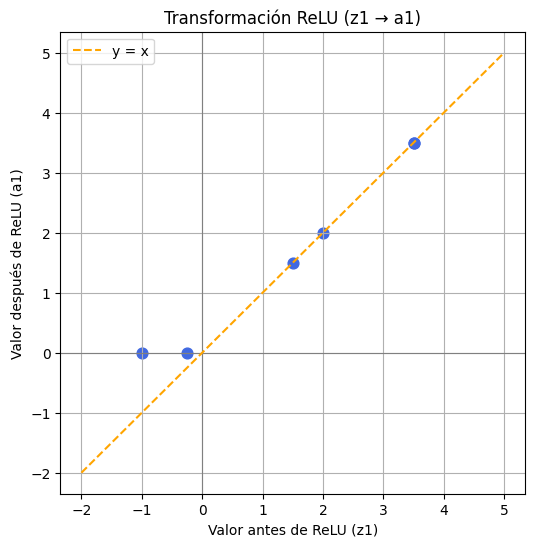

In [43]:
import matplotlib.pyplot as plt

# Convertimos a CPU para asegurar compatibilidad con matplotlib
z1_cpu = z1.detach().cpu()
a1_cpu = a1.detach().cpu()

plt.figure(figsize=(6, 6))
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

# Dibujamos puntos: z1 → a1
plt.scatter(z1_cpu, a1_cpu, color='royalblue', s=60)

# Línea identidad para mostrar dónde ReLU deja pasar los positivos
plt.plot([-2, 5], [-2, 5], color='orange', linestyle='--', label='y = x')

plt.title("Transformación ReLU (z1 → a1)")
plt.xlabel("Valor antes de ReLU (z1)")
plt.ylabel("Valor después de ReLU (a1)")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
from mlp_viz import draw, draw_dense, draw_layer
draw([layer1, "ReLU"])   

ImportError: cannot import name 'draw' from 'mlp_viz' (/root/DL/DL_VS/dl-notebooks/02-Feedforward and Error Funcions/mlp_viz.py)